## Data Description<br>
- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License 0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code: Unique code for the region of the customer
- Previously_Insured 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium: The amount customer needs to pay as premium in the year
- PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response 1 : Customer is interested, 0 : Customer is not interested

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

**Import dataset**

In [231]:
train = pd.read_csv("train.csv")

In [232]:
df = train.copy()

# Exploratory Data Analysis

## 1. Descriptive Statistics

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Checking Columns Type and its detail**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


__Semua kolom yang tersedia sudah sesuai dengan seharusnya dan tidak perlu diubah untuk tahap EDA dan Visualization__

**Checking Null Values**

In [15]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Tidak ada kolom yang memiliki nilai null, kita akan cek juga untuk nilai unik masing-masing kolom**

In [16]:
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}')

columns and number of unique values
id -> 381109
Gender -> 2
Age -> 66
Driving_License -> 2
Region_Code -> 53
Previously_Insured -> 2
Vehicle_Age -> 3
Vehicle_Damage -> 2
Annual_Premium -> 48838
Policy_Sales_Channel -> 155
Vintage -> 290
Response -> 2


**Hasil Check:**
- Tidak ada data yang memiliki nilai null
- Semua tipe data sudah sesuai, namun perlu penyesuaian pada Pre-Processing untuk Modelling
- Nilai unik pada kolom juga tidak memiliki suatu kejanggalan

**Merubah beberapa variabel yang seharusnya masuk pada Kategorik**

In [237]:
import warnings
warnings.filterwarnings("ignore")

In [238]:
df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]]=df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]].astype(np.object)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  object 
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 34.9+ MB


**Check descriptive statistics kolom numerical**

In [17]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Perbedaan yang terlihat signifikan perbedaannya ada pada mean dan median dari Policy_Sales_Channel, itu dapat dinilai dari karena nilai unik dari tipe sales yang diterima oleh user dan tidak ada penjelasan lebih lanjut untuk tiap tipe salesnya per code apa saja.

**Check descriptive statistics kolom categorical**

In [18]:
df.describe(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Tidak ada dominasi yang berlebih di antara tiap unique nilai pada kolom "Gender" dan "Vehicle_Damage".

In [19]:
df.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Sedangkan pada kolom "Vehicle_Age" dominasi ada pada nilai "1-2 Year" dan "< 1 Year" dibandinkan dengan "> 2 Years" dengan perbedaan yang cukup signifikan

**Separating Categorical & Numerical Columns**

In [240]:
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])

numerical= num.columns
categorical = cat.columns 
print(numerical)
print(categorical)

Index(['Age', 'Annual_Premium', 'Vintage'], dtype='object')
Index(['id', 'Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'],
      dtype='object')


## 2. Univariate Analysis

### a. KDE plot (Numerical) Analysis

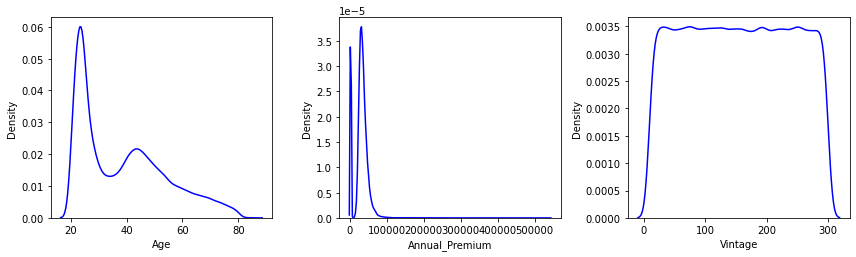

In [124]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (12,10)
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

### b. Violin Analysis

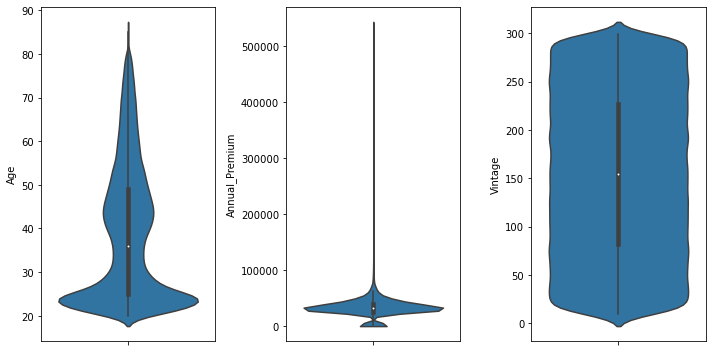

In [13]:
features = numerical.columns
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (10,5)
    plt.subplot(1,len(features),i+1)
    sns.violinplot(y=df[features[i]])
    plt.tight_layout()    

**Analysis:**
Dapat kita lihat dari hasil visualisasi di atas bahwa rata-rata distribusi pada tiap kolom adalah skewed, hanya kolom "Region_Code" yang berdistribusi normal, kolom "Previously_Insured" memiliki bimodal distribusi dikarenakan nilai uniknya hanya 0 atau 1 dan distribusi nya hampir sama rata.

**Boxplot Analysis:**
Pada boxplot chart nilai dengan outlier terbanyak ada pada kolom "Annual_Premium", pada kolom "Response" atau bisa disebut Target memiliki nilai salah satu yang mendominasi.

**Outlier pada variabel Annual_Premium:**

In [137]:
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
outlier = ~((df['Annual_Premium'] >= low_limit) & (df['Annual_Premium'] <= high_limit))
outlier_Annual_Premium = df[outlier]
outlier_Annual_Premium.shape

(10320, 12)

Total outlier pada variabel Annual_Premium adalah 10320 baris data 

### c. Countplot Analysis (Categorical)

In [29]:
fitur = cat.drop(['id', 'Region_Code'], axis=1).columns
fitur

Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'],
      dtype='object')

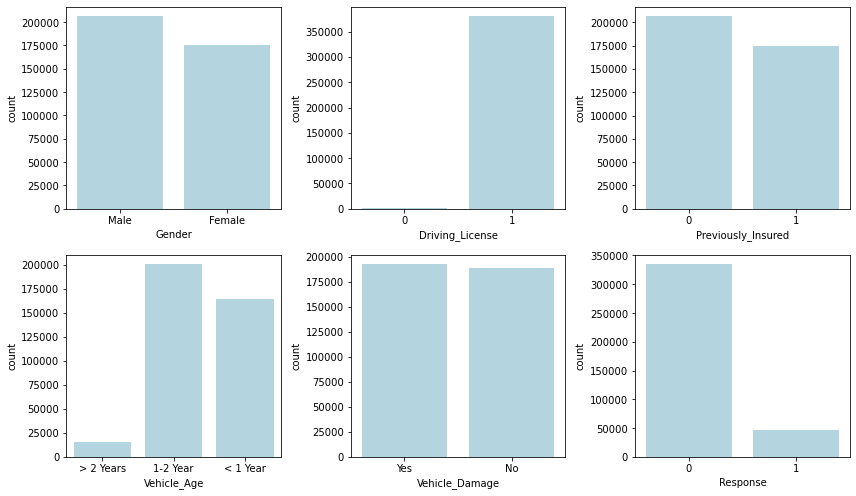

In [32]:
fitur = cat.drop(['id', 'Region_Code','Policy_Sales_Channel'], axis=1).columns
for i in range(0, len(fitur)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[fitur[i]], color='lightblue')
    plt.tight_layout()

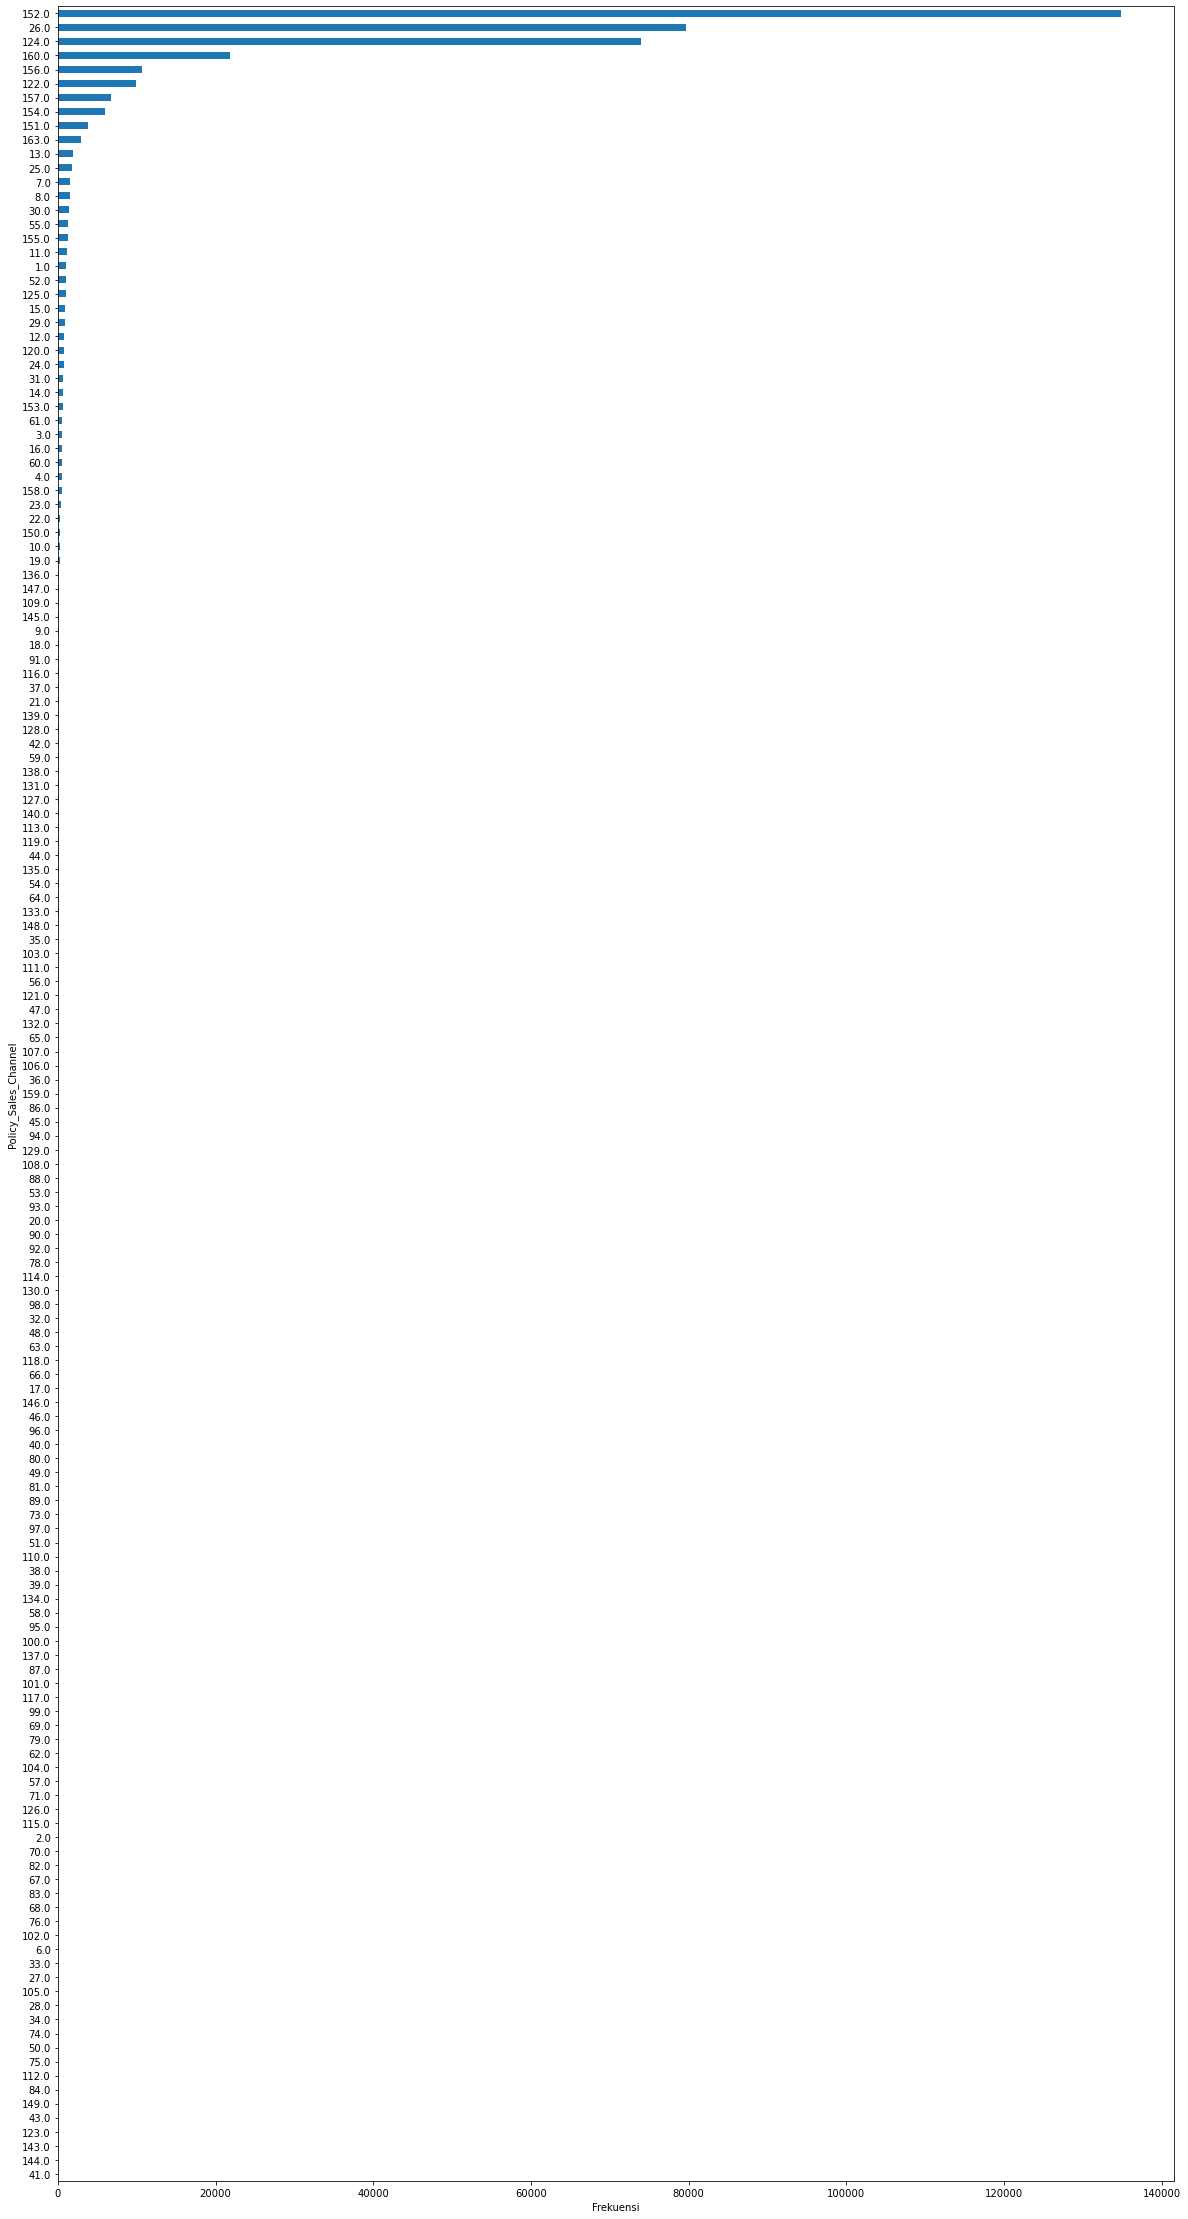

In [123]:
freqPolicy_Sales_Channel = cat['Policy_Sales_Channel'].value_counts(ascending=True)
freqPolicy_Sales_Channel.plot(kind='barh')
plt.rcParams['figure.figsize'] = (20,50)
plt.ylabel('Policy_Sales_Channel')
plt.xlabel('Frekuensi')
plt.show()

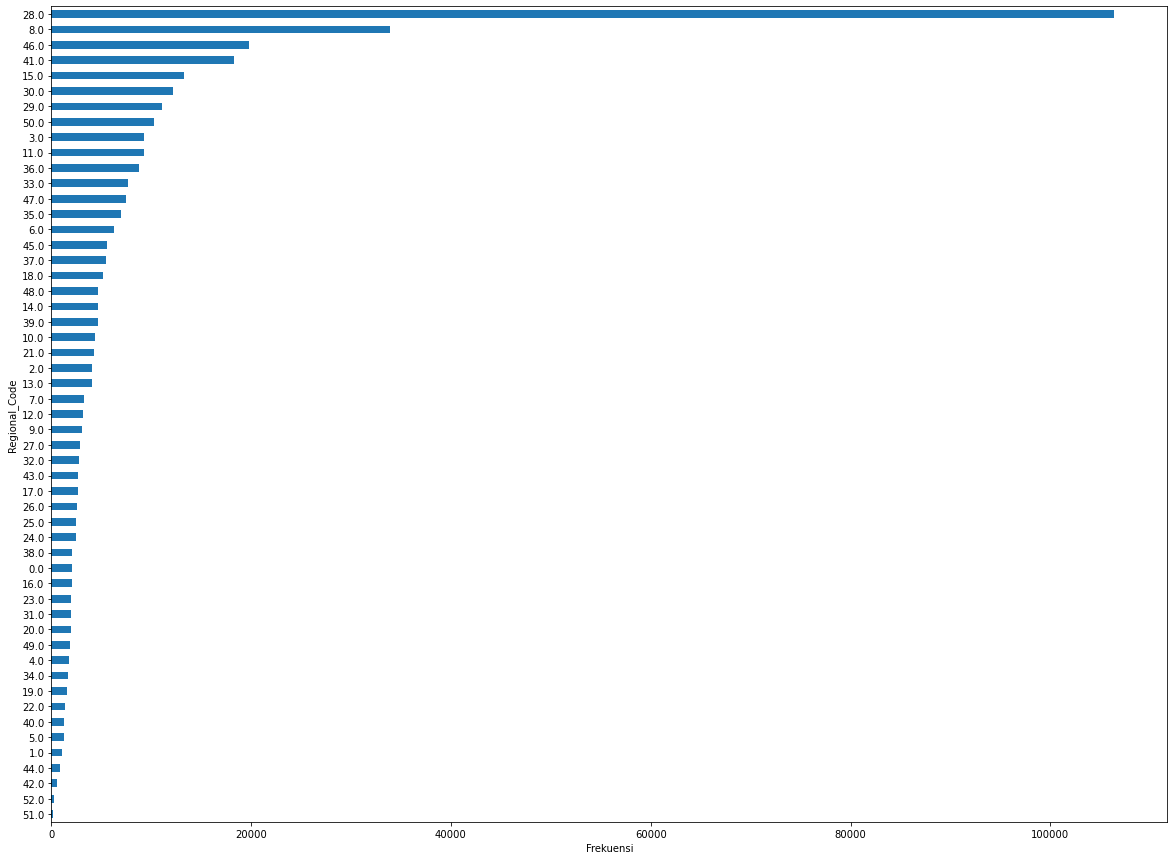

In [117]:
freqRegional_Code = cat['Region_Code'].value_counts(ascending=True)
freqRegional_Code.plot(kind='barh')
plt.rcParams['figure.figsize'] = (20,15)
plt.ylabel('Regional_Code')
plt.xlabel('Frekuensi')
plt.show()

**Countplot Analysis:** Tidak ada nilai yang terlalu mendominasi pada kolom Gender dan Vehicle_Damage, sedangkan pada kolom Vehicle_Age terdapat dua nilai yang mendominasi.

**Follow Up untuk Pre-Processing**
- Melakukan handling outlier
- Melakukan standarisasi pada kolom-kolom yang jauh dari distribusi normal
- Melakukan feature encoding pada kolom yang berisi categorical
- Melakukan class imbalance pada kolom yang memiliki nilai dominasi seperti pada kolom Response

## 3. Multivariate Analysis

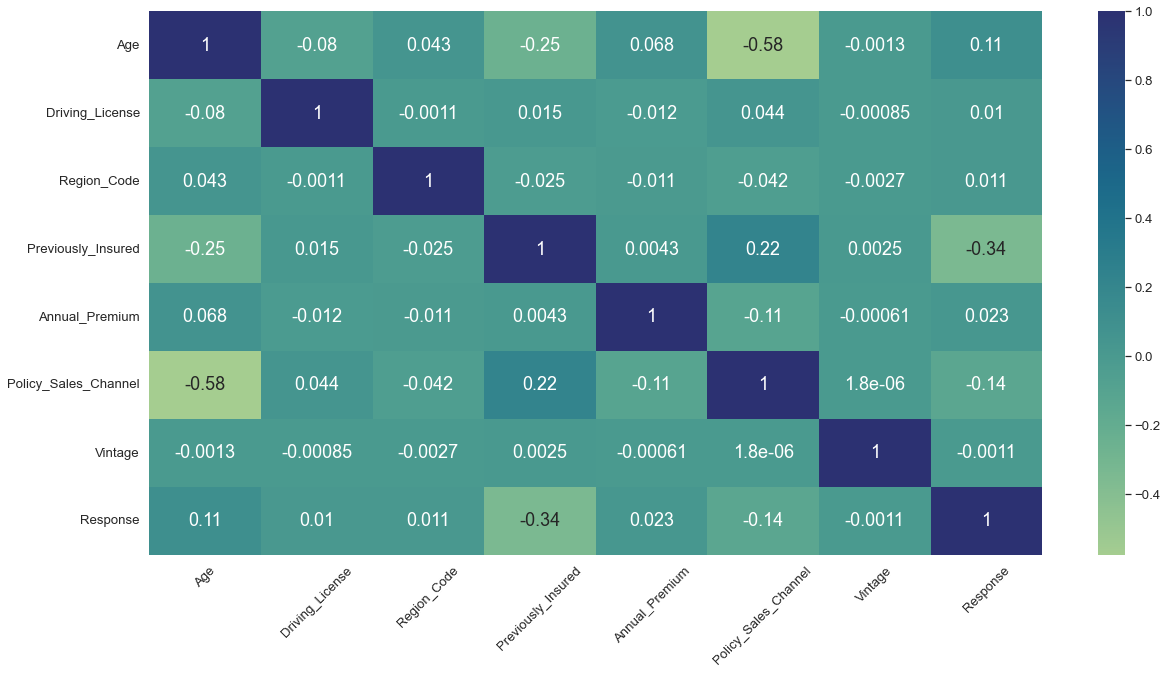

In [127]:
dfcorr = train.drop('id', axis=1)
plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.heatmap(dfcorr.corr(),cmap="crest",annot=True,annot_kws={"size": 18})
plt.xticks(rotation = 45)
plt.show()

- Tidak ada variable yang memiliki korelasi kuat atau r >= 0.7 atau r <= -0.7
- Hanya variable Age dengan Policy_Sales_Channel yang memiliki korelasi yang cukup kuat
- Variabel Response dengan Previously_Insured memiliki korelasi > 0.3 namun cenderung lemah

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Gender'>

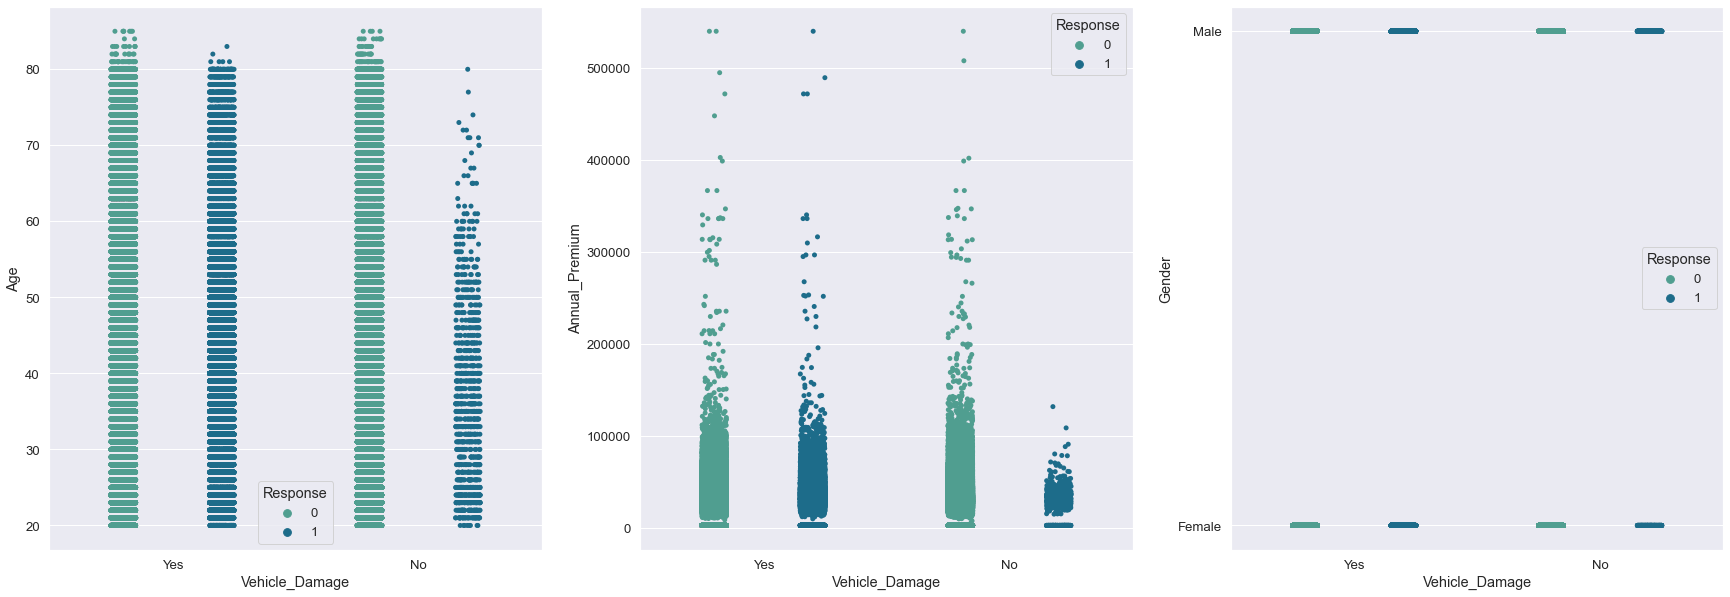

In [27]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Vehicle_Damage", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Vehicle_Damage", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x="Vehicle_Damage", y="Gender", hue='Response',dodge=True, palette='crest')

<AxesSubplot:xlabel='Gender', ylabel='Annual_Premium'>

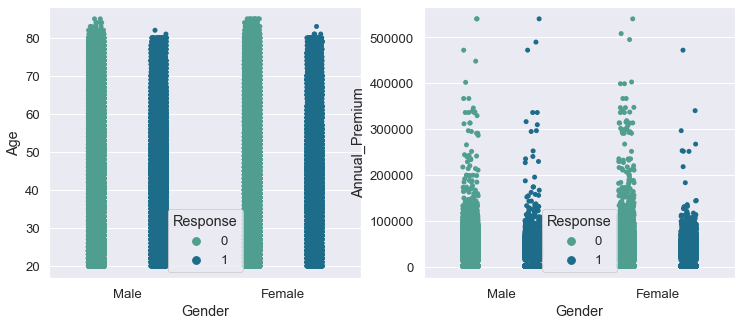

In [28]:
fig = plt.figure(figsize=(19,5))
plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Gender", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Gender", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Annual_Premium'>

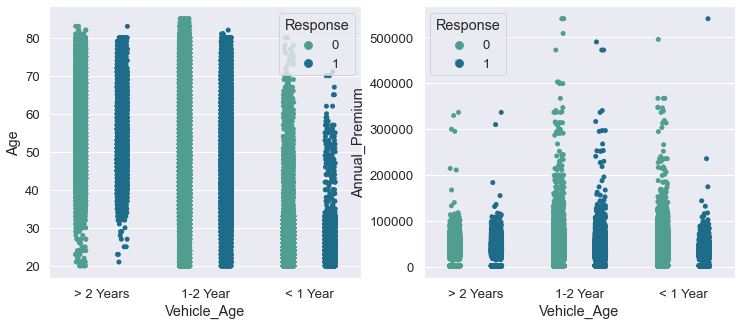

In [29]:
fig = plt.figure(figsize=(19,5))
plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Vehicle_Age", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Vehicle_Age", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

In [5]:
yes_resp = df[df["Response"]==1]
no_resp = df[df["Response"]==0]

print(yes_resp.shape)
print(no_resp.shape)

(46710, 12)
(334399, 12)


**Uji Statistik ANOVA pada variabel target Response dengan varibel numerik**

#### Variabel Age
    - Akan diuji apakah varibael Age berpengaruh terhadap keputusan nasabah tertarik menggunakan asuransi kendaraan/tidak

    - H0 : Usia tidak mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan
      H1 : Usia mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan


In [8]:
nilai_statistik, pvalue = st.f_oneway(yes_resp['Age'], no_resp['Age'])
print('pvalue-anova :', pvalue)
if pvalue > 0.05:
    print("Terima H0 : Tidak cukup bukti untuk menyatakan bahwa Usia tidak mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan")
else:
    print("Tolak H0 : Cukup bukti untuk menyatakan bahwa Usia mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan")

pvalue-anova : 0.0
Tolak H0 : Cukup bukti untuk menyatakan bahwa Usia mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan


#### Variabel Annual_Premium
    - Akan diuji apakah varibael Annual_Premium berpengaruh terhadap keputusan nasabah tertarik menggunakan asuransi kendaraan/tidak

    - H0 : Annual_Premium tidak mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan
      H1 : Annual_Premium mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan


In [10]:
nilai_statistik, pvalue = st.f_oneway(yes_resp['Annual_Premium'], no_resp['Annual_Premium'])
print('pvalue-anova :', pvalue)
if pvalue > 0.05:
    print("Terima H0 : Tidak cukup bukti untuk menyatakan bahwa Annual Premium/Premi tahunan berpengaruh terhadap ketertarikan nasabah untuk menggunakan asuransi Kendaraan")
else:
    print("Tolak H0 : Cukup bukti untuk menyatakan bahwa  Annual Premium/Premi tahunan berpengaruh terhadap ketertarikan nasabah untuk menggunakan asuransi Kendaraan")

pvalue-anova : 3.722315140370128e-44
Tolak H0 : Cukup bukti untuk menyatakan bahwa  Annual Premium/Premi tahunan berpengaruh terhadap ketertarikan nasabah untuk menggunakan asuransi Kendaraan


#### Variabel Vintage
    - Akan diuji apakah varibael Vintage berpengaruh terhadap keputusan nasabah tertarik menggunakan asuransi kendaraan/tidak

    - H0 : Vintage tidak mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan
      H1 : Vintage mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan


In [12]:
nilai_statistik, pvalue = st.f_oneway(yes_resp['Vintage'], no_resp['Vintage'])
print('pvalue-anova :', pvalue)
if pvalue > 0.05:
    print("Terima H0 : Tidak cukup bukti untuk menyatakan bahwa Vintage berpengaruh terhadap ketertarikan nasabah untuk menggunakan asuransi Kendaraan")
else:
    print("Tolak H0 : Cukup bukti untuk menyatakan bahwa Vintage tahunan berpengaruh terhadap ketertarikan nasabah untuk menggunakan asuransi Kendaraan")

pvalue-anova : 0.5167036522730712
Terima H0 : Tidak cukup bukti untuk menyatakan bahwa Vintage berpengaruh terhadap ketertarikan nasabah untuk menggunakan asuransi Kendaraan


In [20]:
print(categorical.columns)

Index(['id', 'Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'],
      dtype='object')


**Uji Statistik Chi_Square pada variabel target Response dengan varibel kategorik**

In [21]:
from scipy.stats import chi2_contingency

In [22]:
categorical.columns
list=[]

for i in categorical.columns:
    ctab = pd.crosstab(df[i], df['Response'])
    stat, p, dof, expected = chi2_contingency(ctab)
    list.append(p)
list

for i in range(0,9):
    if list[i] > 0.05:
        result =  "Terima H0"
        print(result,categorical.columns[i],'p-value',list[i])

    else:
        result =  "Tolak H0"
        print(result,categorical.columns[i],'p-value',list[i])

Terima H0 id p-value 0.4992384134296765
Tolak H0 Gender p-value 7.665800628415621e-230
Tolak H0 Driving_License p-value 5.111753504019177e-10
Tolak H0 Region_Code p-value 0.0
Tolak H0 Previously_Insured p-value 0.0
Tolak H0 Vehicle_Age p-value 0.0
Tolak H0 Vehicle_Damage p-value 0.0
Tolak H0 Policy_Sales_Channel p-value 0.0
Tolak H0 Response p-value 0.0


Pada seluruh variabel kategorik kecuali id, Uji Chi Square nya menghasilkan "Tolak H0" dimana hal ini cukup bukti untuk menyatakan bahwa ada hubungan antara variabel-variabel tersebut dengan ketertarikan nasabah menggunakan asuransi Kendaraan

## 4. Insight Business

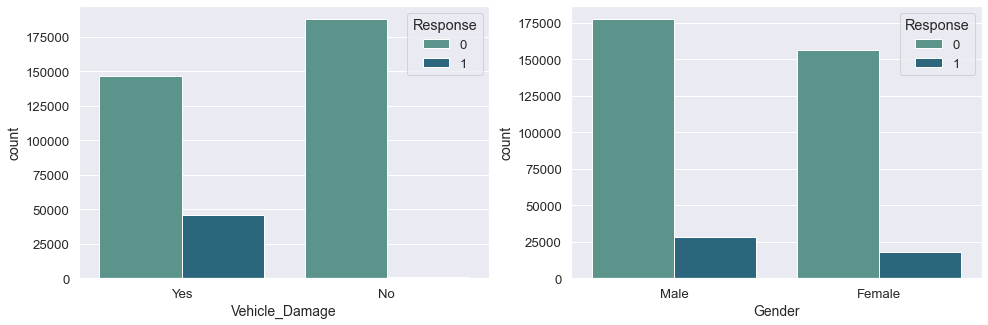

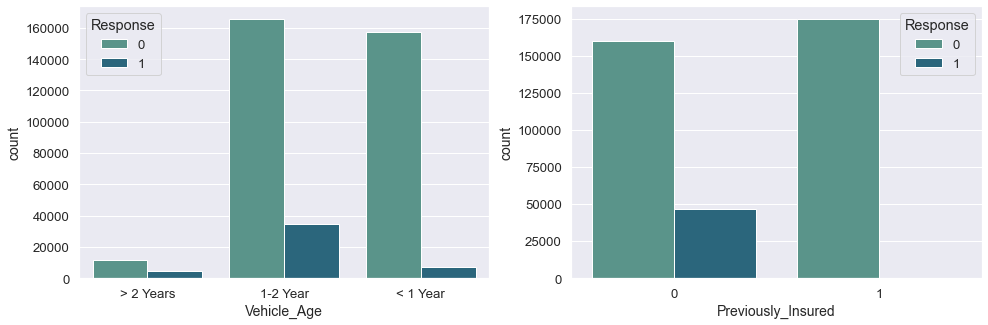

In [138]:
plt.rcParams['figure.figsize'] = (25,5)
plt.subplot(1, 3, 1)
sns.countplot(x=df['Vehicle_Damage'],hue=df['Response'],palette = 'crest')
plt.xlabel('Vehicle_Damage', fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.subplot(1, 3, 2)
sns.countplot(df['Gender'], hue=df['Response'],palette = 'crest')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('count', fontsize = 14)


plt.show()
plt.subplot(1, 3, 1)
sns.countplot(df['Vehicle_Age'], hue=df['Response'],palette = 'crest')
plt.xlabel('Vehicle_Age', fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.rcParams['figure.figsize'] = (25,5)
plt.subplot(1, 3, 2)
sns.countplot(x=df['Previously_Insured'],hue=df['Response'],palette = 'crest')
plt.xlabel('Previously_Insured', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Frekuensi'>

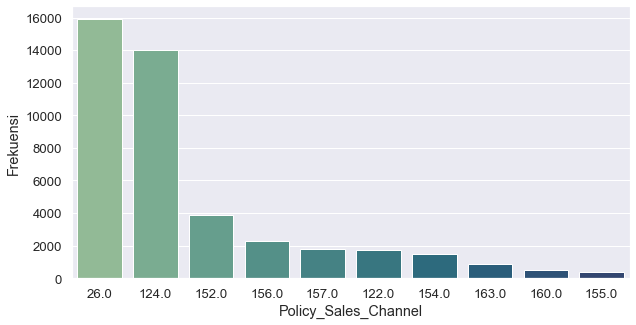

In [263]:
psc = cat[cat['Response']==1].groupby(['Policy_Sales_Channel'])['id'].count().reset_index()
psc = rc.sort_values(by=['id'], ascending=False)
psc = rc.head(10)
psc = psc[['Policy_Sales_Channel','id']]
psc.columns = ['Policy_Sales_Channel','Frekuensi']

psc['Policy_Sales_Channel'] = psc['Policy_Sales_Channel'].astype(str)
sns.barplot(data=psc, x="Policy_Sales_Channel", y="Frekuensi",palette = 'crest')

<AxesSubplot:xlabel='Age', ylabel='Density'>

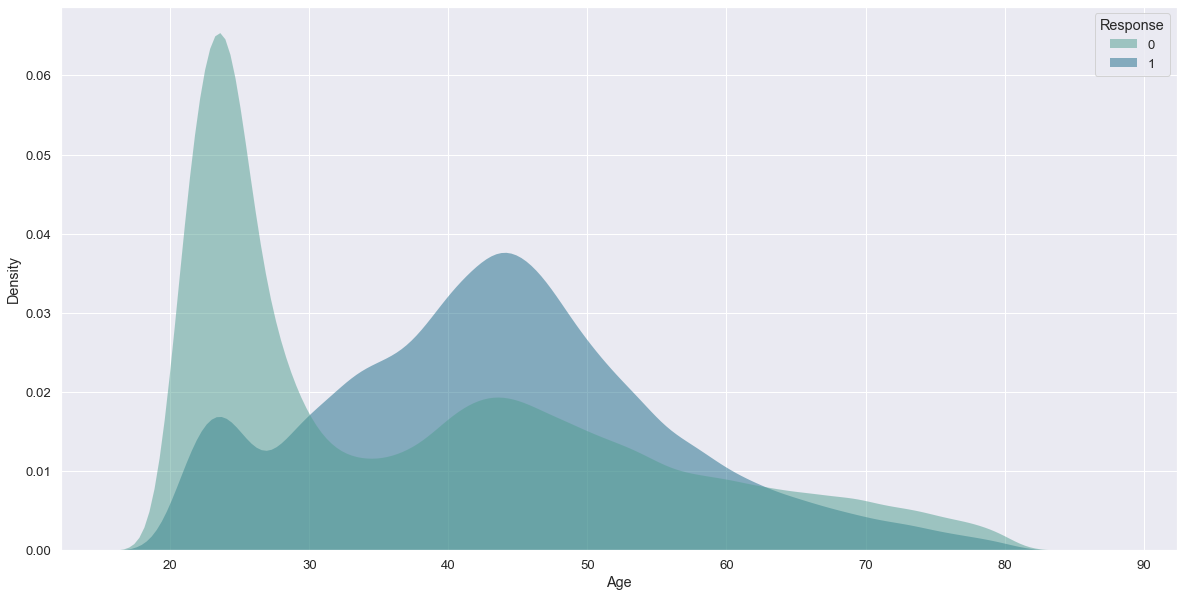

In [140]:
plt.rcParams['figure.figsize'] = (20,10)
sns.kdeplot(data=df, x="Age", hue="Response",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)

In [143]:
!pip install squarify
import squarify

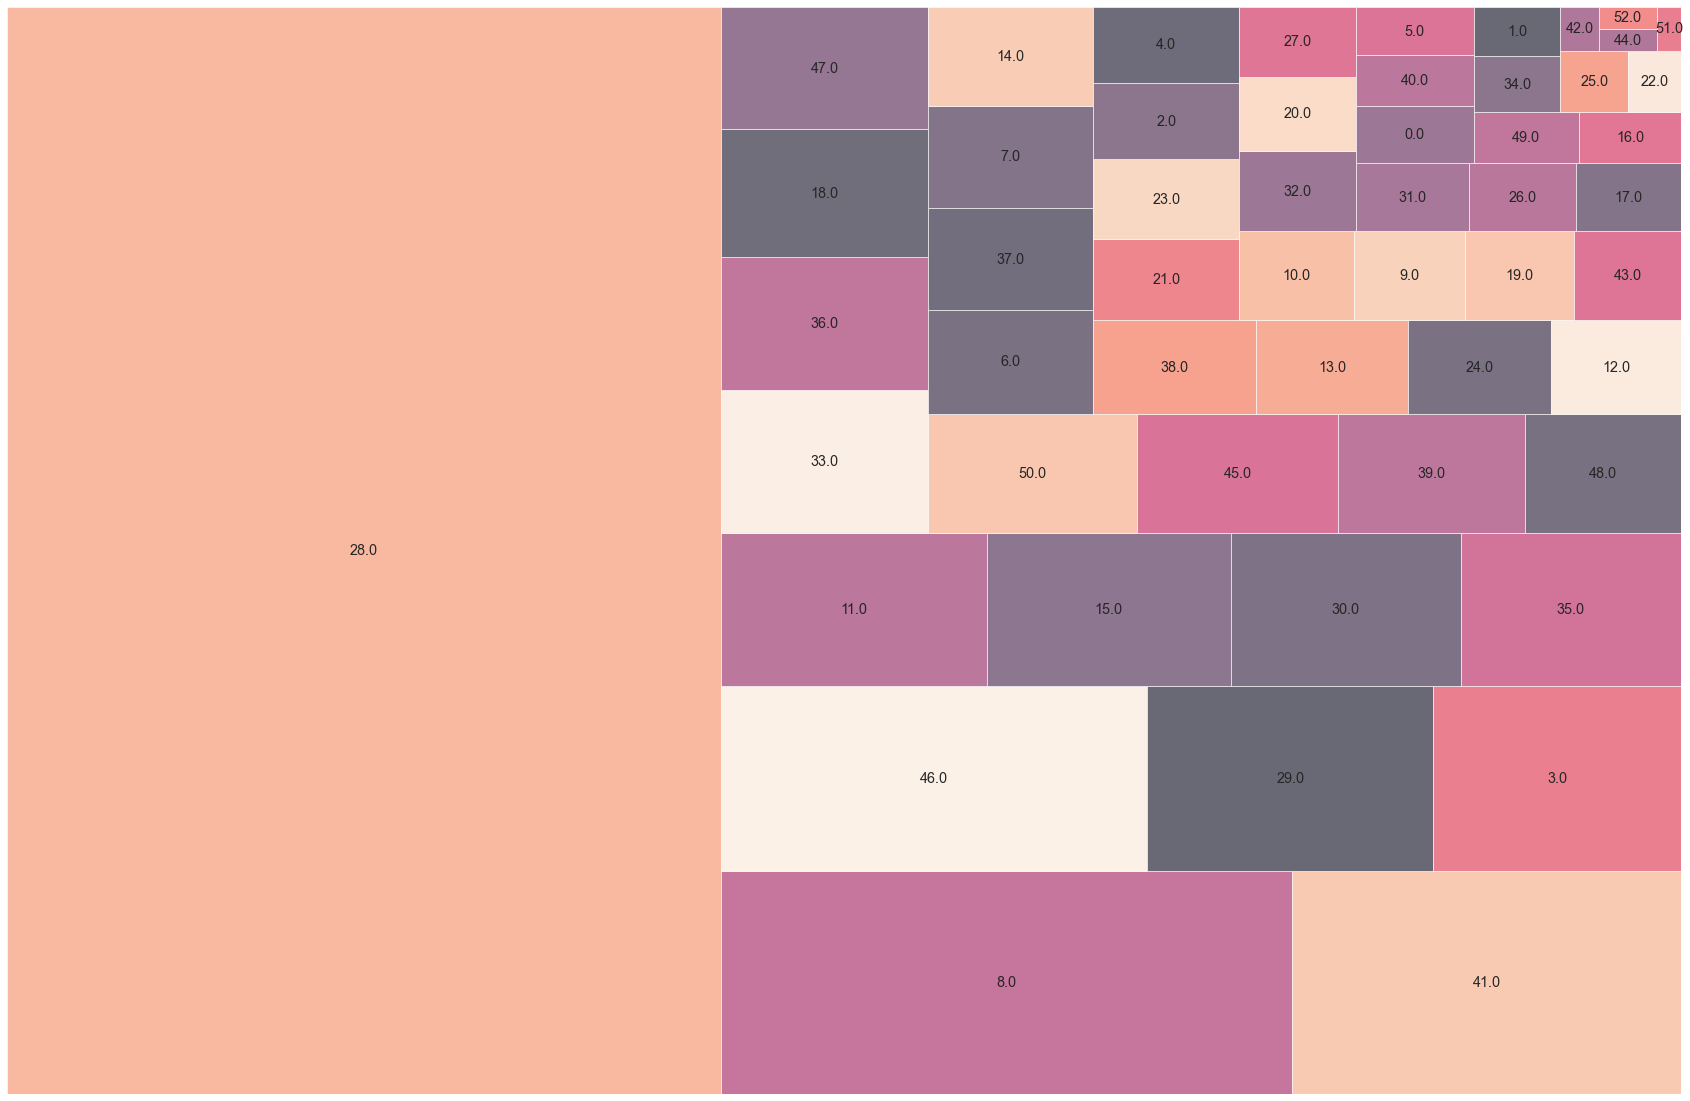

In [192]:
df_yes = df[df['Response']==1]
rc = df_yes.groupby(['Region_Code'])['id'].count().reset_index()
rc = rc.sort_values(by=['id'], ascending=False)
rc.columns = ['Region_Code', 'Frekuensi']
label = rc['Region_Code'].values.tolist()
sizes = rc['Frekuensi'].values.tolist()

plt.rcParams['figure.figsize'] = (30,20)
squarify.plot(sizes=sizes, label=label, alpha=0.6)
plt.axis('off')
plt.show()

- Pada nasabah yang tertarik menggunakan Asuransi Kendaraan, kondisi kendaraan sebelumnya lebih banyak yang telah mengalami kerusakan dibandingkan yang belum. 

- Nasabah yang tertarik menggunakan Asuransi Kendaraan baik Male maupun Female ada perbedaan namun tidak signifikan

- Pada kelompok usia kendaraan 1-2 tahun lebih banyak yang tertarik menggunakan asuransi Kendaraan dibandingkan kelompok lain seperti kelompok usia kendaraan <1 tahun dan usia kendaran >2 tahun

- Nasabah yang tertarik menggunakan Asuransi kendaraan, sebelumnya banyak yang belum menggunakan Asuransi Kendaraan.

- Ada 10 kode jenis Policy_Sales_Channel yang paling banyak dalam memberikan kontribusi ketertarikan nasabah menggunakan Asuransi Kendaraan

- Usia Nasabah dari 33 – 52 banyak yang tertarik menggunakan Asuransi Kendaraan

- Ada beberapa Region_Code dengan code 28.0, 41.0, 8.0, 46.0, 29.0, dimana wilayah tersebut nasabah yang tertarik menggunakan Asuransi Kendaraan lebih banyak dibandingkan Region lain



**Solusi untuk Perusahaan Asuransi:**
Oleh karena itu perusahaan dapat memfokuskan pada kategori-kategori tersebut untuk menarik nasabah agar lebih banyak yang tertarik menggunakan Asuransi Kendaraan dengan menggunakan strategi terbaik misalkan menggunakan top 10 jenis Policy_Sales_Channel. Kemudian perusahaan juga dapat memfokuskan pada beberapa Region yang memiliki nasabah dengan ketertarikan Asuransi Kendaraan paling banyak dibandingkan Region lain. Sedemikian sehingga diharapkan hal-hal tersebut akan memberikan hasil atau dampak yang baik dan keuntungan untuk perusahaan Asuransi.

